In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [ ]:
# Remember that the variance is the squared deviation from the mean
# In standard statistical practice (and in finance) you use sample variance
# Standard deviation > square root of the variance
# Covariance measures the direction of a relationship between two variables. A positive covariance means thye move in the same directions

In [ ]:
# Portfolio Expected Return > measured using the mean return weighted by the asset
# Portfolio Risk > measured using the portfolio standard deviation. Square root of the Portfolio Variance taking the weights, variances and covariances of portfolio components

**Porfolio Risk:**

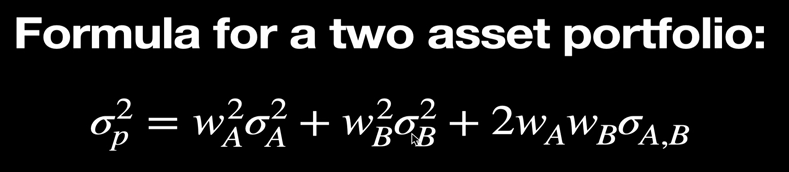


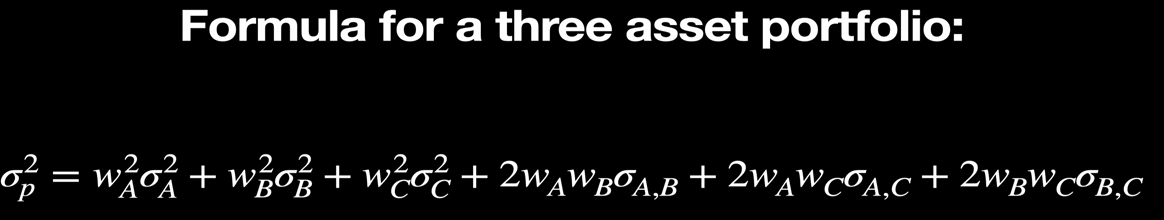



In [3]:
df = pd.DataFrame({
    'A':[1,5,3],
    'B':[1,6,5]
})
df

,A,B
0,1,1
1,5,6
2,3,5


In [4]:
# Mean Function
df.mean()

A    3.0
B    4.0
dtype: float64

In [5]:
# Expected return
# we have two elements, so > 50%
(0.5 * 3) + (0.5 * 4)

3.5

In [8]:
# Covariance
df.cov()
# AA is the covariance between A and A etc.

,A,B
A,4.0,5.0
B,5.0,7.0


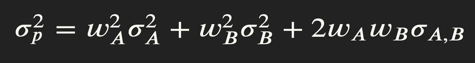

In [7]:
# ^ Variance ^
var = ((0.5**2)*4) + ((0.5**2)*7) + 2*0.5*0.5*5
var

5.25

In [9]:
# Porfolio Risk
var**(1/2)

2.29128784747792

In [ ]:
# The approach so far is not scaleable for complex portfolios

In [12]:
# Dot Product to to calculate porfolio return and portfolio risk
# np.ones() returns an arrey of ones

m = df.mean()

w = np.ones(len(df.columns)) / len(df.columns)
# this returns an array with the wieghts of our portfolio > array([0.5, 0.5])

w.dot(m)

3.5

In [14]:
w.dot(df.cov().dot(w)) # same result as our variance

5.25

In [16]:
w.dot(df.cov().dot(w))**(1/2) # same as Portfolio Risk

2.29128784747792

In [ ]:
# EXAMPLE

In [21]:
df = yf.download(['MSFT','KO','TSLA'], start = '2015-01-01') ['Adj Close']
df.head()

[*********************100%%**********************]  3 of 3 completed


,KO,MSFT,TSLA
Date,,,
2015-01-02,32.102886,40.534851,14.620667
2015-01-05,32.102886,40.162086,14.006000
2015-01-06,32.346668,39.572613,14.085333
2015-01-07,32.750423,40.075401,14.063333
2015-01-08,33.146568,41.254337,14.041333


In [24]:
ret_df = df.pct_change()
ret_df.dropna(inplace=True)
ret_df.head()

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.014677,0.005664
2015-01-07,0.012482,0.012705,-0.001562
2015-01-08,0.012096,0.029418,-0.001564
2015-01-09,-0.011032,-0.008405,-0.018802


In [25]:
(ret_df+ 1).cumprod() -1
# Telsa has risen 1600% since 2015

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.023739,-0.036615
2015-01-07,0.020171,-0.011335,-0.038120
2015-01-08,0.032511,0.017750,-0.039624
2015-01-09,0.021120,0.009196,-0.057681
...,...,...,...
2023-09-01,0.847497,7.108085,15.757785
2023-09-05,0.832234,7.228721,16.542974
2023-09-06,0.830988,7.212193,16.230403


<Axes: xlabel='Date'>

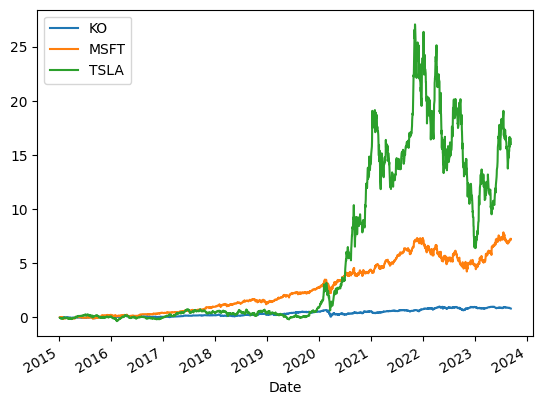

In [26]:
((ret_df+ 1).cumprod() -1).plot()

In [27]:
ret_df.mean()

KO      0.000340
MSFT    0.001122
TSLA    0.001935
dtype: float64

In [28]:
ret_df.std()
# unsurprisingly, CocaCola has the lowest standard deviation

KO      0.011550
MSFT    0.017672
TSLA    0.035749
dtype: float64

In [29]:
ret_df.cov()
# all assets have a positive correlation

,KO,MSFT,TSLA
KO,0.000133,0.000087,0.000075
MSFT,0.000087,0.000312,0.000263
TSLA,0.000075,0.000263,0.001278


In [30]:
ret_df.corr()
# KO's correlation to TLSA is particularly weak

,KO,MSFT,TSLA
KO,1.000000,0.427293,0.182643
MSFT,0.427293,1.000000,0.415896
TSLA,0.182643,0.415896,1.000000


In [ ]:
# Next are the Porfolio Expected Return and the Portfolio Variance

In [35]:
w = np.ones(len(ret_df.columns))/len(ret_df.columns)
w

array([0.33333333, 0.33333333, 0.33333333])

In [37]:
# Portfolio Expected Return
pf_exp = w.dot(ret_df.mean())
pf_exp

0.00113247878038478

In [39]:
# Portfolio Standard Deviation
pf_std = (w.dot(ret_df.cov().dot(w)))**(1/2)
pf_std

0.016912978743672067

In [ ]:
# Comparing it with the value of the single components

In [40]:
ret_df.mean()

KO      0.000340
MSFT    0.001122
TSLA    0.001935
dtype: float64

In [41]:
ret_df.std()

KO      0.011550
MSFT    0.017672
TSLA    0.035749
dtype: float64

In [42]:
# Sharpe Ratio
# compares the return of an investment with its risk
# the higher the ratio, the better

pf_exp / pf_std

0.06695915589727167

In [43]:
# Sharpe Ratio for the components
ret_df.mean() / ret_df.std()

KO      0.029474
MSFT    0.063490
TSLA    0.054128
dtype: float64

In [45]:
# Finally, the total return of the portfolio
# we are just taking the mea of every single row

ret_df.mean(axis=1)

Date
2015-01-05   -0.017079
2015-01-06   -0.000473
2015-01-07    0.007875
2015-01-08    0.013317
2015-01-09   -0.012746
                ...   
2023-09-01   -0.018863
2023-09-05    0.017824
2023-09-06   -0.006835
2023-09-07   -0.006095
2023-09-08    0.000442
Length: 2185, dtype: float64

In [48]:
(ret_df.mean(axis=1) +1).cumprod() -1
# starting in 2015, we would have made +767%

Date
2015-01-05   -0.017079
2015-01-06   -0.017544
2015-01-07   -0.009807
2015-01-08    0.003379
2015-01-09   -0.009410
                ...   
2023-09-01    7.624778
2023-09-05    7.778507
2023-09-06    7.718502
2023-09-07    7.665364
2023-09-08    7.669196
Length: 2185, dtype: float64

<Axes: xlabel='Date'>

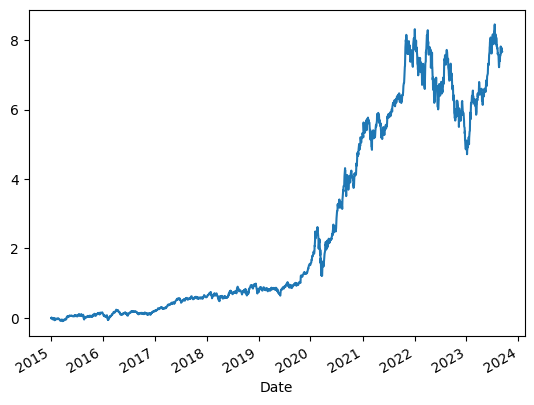

In [47]:
((ret_df.mean(axis=1) +1).cumprod() -1).plot()

In [50]:
# Efficient Frontier

In [51]:
def give_weights():
  rand = np.random.random(len(df.columns))
  rand /= rand.sum()
  return rand

In [61]:
give_weights().sum() # always sums up to 1

1.0

In [62]:
pf_exp,pf_stds,weights = [],[],[]

for i in range(2000):
  w = give_weights()
  weights.append(w)
  pf_exp.append(w.dot(ret_df.mean())*252)
  pf_stds.append(w.dot(ret_df.cov().dot(w))*252)

<Axes: xlabel='pf_stds', ylabel='pf_exp'>

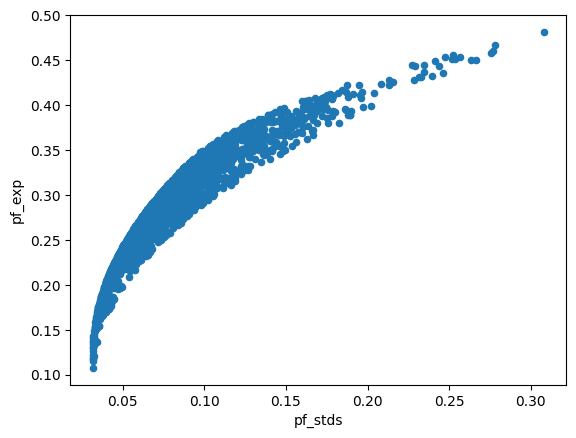

In [64]:
tog = pd.DataFrame({
    'pf_exp':pf_exp,
    'pf_stds':pf_stds,
    'weights':weights
})

tog.plot(x='pf_stds',y='pf_exp',kind='scatter')

In [66]:
sharpes = tog.pf_exp / tog.pf_stds
sharpes

0       3.610029
1       3.867470
2       4.550811
3       3.424394
4       4.206855
          ...   
1995    3.496328
1996    3.752795
1997    2.885616
1998    3.951970
1999    2.529568
Length: 2000, dtype: float64

In [67]:
tog.loc[sharpes.nlargest(1).index]

,pf_exp,pf_stds,weights
1491,0.195712,0.038371,"[0.5485060877891474, 0.34898826009299777, 0.10..."
